### TITLE: MNIST HANDWRITING PREDICTION 
#### AUTHOR : VAISHNAV KRISHNA P
#### LABSHEET01

In [135]:
# Loading the necessory depednecies 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [78]:
# Loading the datasets 
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [79]:
# shape of the datasets 
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Note: 
- we have 10000 records for training & 60000 records for testing model

In [81]:
# Printing one of the records as array
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [84]:
# shape of the array 
print(X_train[0].shape)

(28, 28)


Label: 5


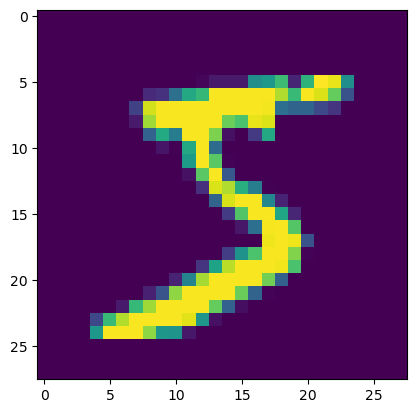

In [86]:
# printing the array as image 
plt.imshow(X_train[0])
print(f"Label: {y_train[0]}")

#### NORMALIZE THE ARRAY 

In [89]:
# Normalize the data records 
X_train = X_train/255 
X_test = X_test/255 

In [91]:
# After Normalizing the records 
print(X_train[0][9])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.31372549 0.61176471 0.41960784 0.99215686
 0.99215686 0.80392157 0.04313725 0.         0.16862745 0.60392157
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


### BUILD MODEL

In [195]:
# building the model 
model = Sequential([
    Flatten( input_shape=(28, 28) ),
    Dense( 128, activation="relu"),
    Dense( 64, activation='relu'),
    Dense( 32, activation='relu'),
    Dense( 10, activation='softmax')
])

#### COMPILE THE MODEL

In [198]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#### FITTING THE MODEL

In [201]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8664 - loss: 0.4404
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9667 - loss: 0.1118
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9772 - loss: 0.0760
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9829 - loss: 0.0550
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9857 - loss: 0.0464


In [202]:
# Accuracies of 5 epochs
model.history.history['accuracy']

[0.9257333278656006,
 0.9674833416938782,
 0.9763166904449463,
 0.9816166758537292,
 0.984416663646698]

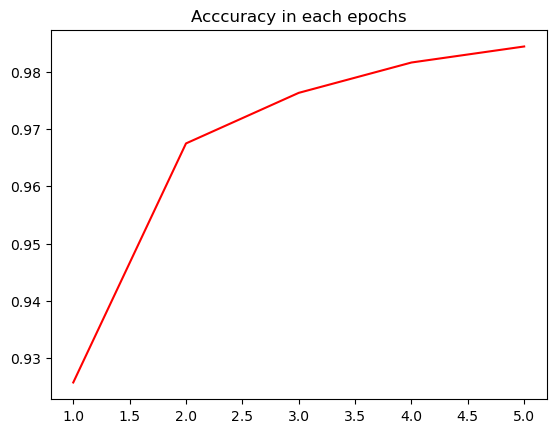

In [203]:
# visualize this using a line plot 
plt.title("Acccuracy in each epochs")
plt.plot(np.arange(1,6), model.history.history['accuracy'], color='r')
plt.show()

#### EVALUATION

In [205]:
# Model accuracy and model loss
model_loss, model_accuracy = model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0901


In [206]:
print(f"Model accuracy over test dataset: {model_accuracy} and loss: {model_loss}")

Model accuracy over test dataset: 0.9760000109672546 and loss: 0.07986747473478317


#### TESTING THE MODEL 

6


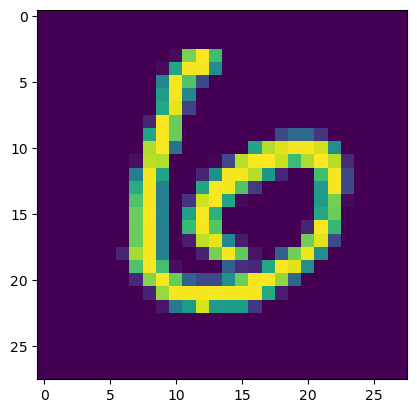

In [247]:
# testing with random one image 
plt.imshow(X_test[11])
print(y_test[11])

In [249]:
# predicting using the model 
prediction_array = model.predict(X_test[11].reshape(1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [251]:
model_label = prediction_array.argmax()

In [253]:
print(f"Digit in Image predicted as: {model_label}")

Digit in Image predicted as: 6
